In [1]:
import matplotlib.pyplot as plt
import numpy as np

TotalChips = int(35)                              # specify number of chips you are using for data
TotalCryo = int(3); Cryocycles = [0,5,20]#,100]    # specify cryocyles

T = []
# Need to adjust the numbering of the chips
# We start at 20 for this batch
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataRT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'RT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.
                
# Fill lists of lists based off of Pass-Fail
# passRMS, etc... will be filled with data on passed values; failRMS with failed
passRMS = []; passMean = []; passCh = []; passPF = []; passGain = []
failRMS = []; failMean = []; failCh = []; failPF = []; failGain = []

# create a list of lists - containing each chip as a seperate index
for i in range(len(chips)):
    passRMS.append(([])); passMean.append(([])); passCh.append(([])); passPF.append(([])); passGain.append(([]))
    failRMS.append(([])); failMean.append(([])); failCh.append(([])); failPF.append(([])); failGain.append(([]))
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        passRMS[i].append(([])); passMean[i].append(([])); 
        passCh[i].append(([])); passPF[i].append(([])); passGain[i].append(([]))
        failRMS[i].append(([])); failMean[i].append(([]));
        failCh[i].append(([])); failPF[i].append(([])); failGain[i].append(([]))
# append data to the associated lists, based off of P/F
for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[j][i][k] == 0.:
                passRMS[j][i].append((RMS[j][i][k])); passMean[j][i].append((Mean[j][i][k]));
                passCh[j][i].append((Ch[j][i][k]))
                passPF[j][i].append((PF[j][i][k])); passGain[j][i].append((Gain[j][i][k])) 
            if PF[j][i][k] == 1.:
                failRMS[j][i].append((RMS[j][i][k])); failMean[j][i].append((Mean[j][i][k]));
                failCh[j][i].append((Ch[j][i][k]))
                failPF[j][i].append((PF[j][i][k])); failGain[j][i].append((Gain[j][i][k]))

print('done')

done


In [14]:
%matplotlib

# Thanks to CE talk (12/6/21) by H. Chen (DUNE TPC Electronics Consortium Meeting) for plot idea

chip = []
PFchips = np.ones((len(chips),len(Cryocycles),1))
for i in range(20,len(chips)+20):
    chip.append(i)
    
for i in range(len(PF)):
    for j in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[i][j][k] == 1. and (Mean[i][j][k] > 6500. or Mean[i][j][k] < 5500.):
                PFchips[i][j] = 2.

fig, (a,b,c) = plt.subplots(3)
for i in range(len(PF)):
    a.bar(chip[i],PFchips[i][0],color='tan')
    b.bar(chip[i],PFchips[i][1],color='tan')
    c.bar(chip[i],PFchips[i][1],color='tan')
    if PFchips[i][0] == 2.:
        a.text(chip[i]-.5,2.25,chip[i],size=8)
    if PFchips[i][1] == 2.:
        b.text(chip[i]-.5,2.25,chip[i],size=8)
    if PFchips[i][2] == 2.:
        c.text(chip[i]-.5,2.25,chip[i],size=8)
    
    
a.set_xticks(range(20,len(chip)+20)); b.set_xticks(range(20,len(chip)+20)); c.set_xticks(range(20,len(chip)+20))
a.tick_params(axis = 'x', labelsize=5); b.tick_params(axis = 'x', labelsize=5); c.tick_params(axis = 'x', labelsize=5)

for n, label in enumerate(a.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(b.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(c.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)

a.set_ylim([0,3.0]); b.set_ylim([0,3.0]); c.set_ylim([0,3.0])
a.set_title('P/F - Channel Response | 200mV BL RT | 1 = Pass, 2 = Fail')
#a.set_ylabel('RT[0] Channel Response (P/F)')
b.set_ylabel('Channel Response (P/F)')
#c.set_ylabel('RT[20] Channel Response (P/F)')
#a.set_xlabel('RT[0] P3 LArASIC Chip Number'); b.set_xlabel('RT[5] P3 LArASIC Chip Number')
c.set_xlabel('P3 LArASIC Chip Number')
a.text(len(chips)+15,2.5,'RT[0]',size=15); b.text(len(chips)+15,2.5,'RT[5]',size=15)
c.text(len(chips)+15,2.5,'RT[20]',size=15)

plt.show()

print('done')

Using matplotlib backend: Qt5Agg
done


In [16]:
%matplotlib

# Plot chips outside 5-sigma as well

chip = []
PFchips = np.ones((len(chips),len(Cryocycles),1))
for i in range(20,len(chips)+20):
    chip.append(i)
    
RT0Meanlow = 2024.6506875; RT0Meanhigh = 2555.4306874999997
RT0RMSlow = 0; RT0RMShigh = 133.99567108125
RT0Gainlow = 47.346106250000005; RT0Gainhigh = 56.94610625

RT5Meanlow = 2027.3123577235772; RT5Meanhigh = 2564.632357723577
RT5RMSlow = 0; RT5RMShigh = 132.3297293558474
RT5Gainlow = 43.54853658536585; RT5Gainhigh = 60.388536585365856

# So far through RT[20]
RT20Meanlow = 1978.4865652951698; RT20Meanhigh = 2617.44656529517
RT20RMSlow = 0; RT20RMShigh = 121.86758456171736
RT20Gainlow = 48.302826475849734; RT20Gainhigh = 55.18282647584973


for i in range(len(PF)):
    for j in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[i][j][k] == 1. and (Mean[i][j][k] > 6500. or Mean[i][j][k] < 5500.):
                PFchips[i][j] = 3.   # Make failed channels = 3
        
            if any(ele > RT0RMShigh for ele in RMS[i][0]) or \
            any(ele < RT0RMSlow for ele in RMS[i][0]) or \
            any(e > RT0Gainhigh for e in Gain[i][0]) or \
            any(e < RT0Gainlow for e in Gain[i][0]) or \
            any(e > RT0Meanhigh for e in Mean[i][0]) or \
            any(e < RT0Meanlow for e in Mean[i][0]):
                    PFchips[i][0] = 2.  # outside 5-sigma
            if any(ele > RT5RMShigh for ele in RMS[i][1]) or \
            any(ele < RT5RMSlow for ele in RMS[i][1]) or \
            any(e > RT5Gainhigh for e in Gain[i][1]) or \
            any(e < RT5Gainlow for e in Gain[i][1]) or \
            any(e > RT5Meanhigh for e in Mean[i][1]) or \
            any(e < RT5Meanlow for e in Mean[i][1]):
                PFchips[i][1] = 2.  # outside 5-sigma
            if any(ele > RT20RMShigh for ele in RMS[i][2]) or \
            any(ele < RT20RMSlow for ele in RMS[i][2]) or \
            any(e > RT20Gainhigh for e in Gain[i][2]) or \
            any(e < RT20Gainlow for e in Gain[i][2]) or \
            any(e > RT20Meanhigh for e in Mean[i][2]) or \
            any(e < RT20Meanlow for e in Mean[i][2]):
                PFchips[i][2] = 2.  # outside 5-sigma

fig, (a,b,c) = plt.subplots(3)
for i in range(len(PF)):
    a.bar(chip[i],PFchips[i][0],color='tan')
    b.bar(chip[i],PFchips[i][1],color='tan')
    c.bar(chip[i],PFchips[i][1],color='tan')
    if PFchips[i][0] == 2.:
        a.text(chip[i]-.5,2.25,chip[i],size=8)
    if PFchips[i][1] == 2.:
        b.text(chip[i]-.5,2.25,chip[i],size=8)
    if PFchips[i][2] == 2.:
        c.text(chip[i]-.5,2.25,chip[i],size=8)
    #if PFchips[i][0] == 3.:
      #  a.text(chip[i]-.5,3.25,chip[i],size=8)
    #if PFchips[i][1] == 3.:
     #   b.text(chip[i]-.5,3.25,chip[i],size=8)
    #if PFchips[i][2] == 3.:
       # c.text(chip[i]-.5,3.25,chip[i],size=8)
    
a.set_xticks(range(20,len(chip)+20)); b.set_xticks(range(20,len(chip)+20)); c.set_xticks(range(20,len(chip)+20))
a.tick_params(axis = 'x', labelsize=5); b.tick_params(axis = 'x', labelsize=5); c.tick_params(axis = 'x', labelsize=5)

for n, label in enumerate(a.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(b.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(c.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)

a.set_ylim([0,4.0]); b.set_ylim([0,4.0]); c.set_ylim([0,4.0])
a.set_title('P/F - Channel Response | 200mV BL RT | 1 = Pass, 2 = Fail')
#a.set_ylabel('RT[0] Channel Response (P/F)')
b.set_ylabel('Channel Response (P/F)')
#c.set_ylabel('RT[20] Channel Response (P/F)')
#a.set_xlabel('RT[0] P3 LArASIC Chip Number'); b.set_xlabel('RT[5] P3 LArASIC Chip Number')
c.set_xlabel('P3 LArASIC Chip Number')
a.text(len(chips)+15,3.5,'RT[0]',size=15); b.text(len(chips)+15,3.5,'RT[5]',size=15)
c.text(len(chips)+15,3.5,'RT[20]',size=15)

plt.show()

print('done')

Using matplotlib backend: Qt5Agg
done


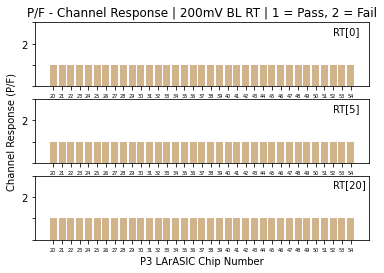

done


In [8]:
'''plt.save file format'''

chip = []
PFchips = np.ones((len(chips),len(Cryocycles),1))
for i in range(20,len(chips)+20):
    chip.append(i)
    
for i in range(len(PF)):
    for j in range(len(Cryocycles)):
        for k in range(0,16):
            # Exclude Disconnections (6000 adc)
            if PF[i][j][k] == 1. and (Mean[i][j][k] > 6500. or Mean[i][j][k] < 5500.):
                PFchips[i][j] = 2.

# Create bar plots for each Cryocycle
fig, (a,b,c) = plt.subplots(3)
for i in range(len(PF)):
    a.bar(chip[i],PFchips[i][0],color='tan')
    b.bar(chip[i],PFchips[i][1],color='tan')
    c.bar(chip[i],PFchips[i][1],color='tan')
    if PFchips[i][0] == 2.:
        a.text(chip[i]-.5,2.25,chip[i],size=8)
    if PFchips[i][1] == 2.:
        b.text(chip[i]-.5,2.25,chip[i],size=8)
    if PFchips[i][2] == 2.:
        c.text(chip[i]-.5,2.25,chip[i],size=8)
    
a.set_xticks(range(20,len(chip)+20)); b.set_xticks(range(20,len(chip)+20)); c.set_xticks(range(20,len(chip)+20))
a.tick_params(axis = 'x', labelsize=5); b.tick_params(axis = 'x', labelsize=5); c.tick_params(axis = 'x', labelsize=5)

for n, label in enumerate(a.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(b.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(c.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)

a.set_ylim([0,3.0]); b.set_ylim([0,3.0]); c.set_ylim([0,3.0])
a.set_title('P/F - Channel Response | 200mV BL RT | 1 = Pass, 2 = Fail')
#a.set_ylabel('RT[0] Channel Response (P/F)')
b.set_ylabel('Channel Response (P/F)')
#c.set_ylabel('RT[20] Channel Response (P/F)')
#a.set_xlabel('RT[0] P3 LArASIC Chip Number'); b.set_xlabel('RT[5] P3 LArASIC Chip Number')
c.set_xlabel('P3 LArASIC Chip Number')
a.text(len(chips)+17,2.45,'RT[0]',size=10)
b.text(len(chips)+17,2.45,'RT[5]',size=10)
c.text(len(chips)+17,2.45,'RT[20]',size=10)

path = '../../../../test.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

plt.show()

print('done')